# **VGG16 (Transfer Learning Model 1) Training asli + Augmentasi**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import os
import cv2 as cv
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import multiprocessing

In [ ]:
path_original = "/content/drive/MyDrive/Skripsi_Dataset/Dataset/Gabungan Train+Val"
path_augmented = "/content/drive/MyDrive/Skripsi_Dataset/Dataset_Augmented/Data Train Gabungan"

In [ ]:
# ====== LOAD DATA TRAINING ASLI ======
key_value = dict()
for i in os.listdir(path_original):
    key_value[i] = os.listdir(os.path.join(path_original, i))

df_orig = []
for key in key_value.keys():
    for j in key_value[key]:
        df_orig.append([key, os.path.join(path_original, key, j)])
df_orig = pd.DataFrame(df_orig, columns=('label', 'path'))
print("Total gambar training asli:", len(df_orig))

Total gambar training asli: 1649


In [ ]:
key_value_aug = dict()
for i in os.listdir(path_augmented):
    key_value_aug[i] = os.listdir(os.path.join(path_augmented, i))

df_aug = []
for key in key_value_aug.keys():
    for j in key_value_aug[key]:
        df_aug.append([key, os.path.join(path_augmented, key, j)])
df_aug = pd.DataFrame(df_aug, columns=('label', 'path'))
print("Total gambar training augmentasi:", len(df_aug))

Total gambar training augmentasi: 1649


In [ ]:
df = pd.concat([df_orig, df_aug], ignore_index=True)
print("Total gambar setelah digabung:", len(df))

Total gambar setelah digabung: 3298


In [ ]:
# # ====== LOAD GAMBAR TRAINING ======
# def readimg(path):
#     img = cv.imread(path)
#     img = cv.resize(img, (224, 224))
#     return img

# with multiprocessing.Pool(2) as p:
#     images = p.map(readimg, df['path'])

# images = np.array(images, dtype='float')

In [ ]:
# ====== LOAD GAMBAR TRAINING ======
def readimg(path):
    img = cv.imread(path)
    img = cv.resize(img, (224, 224))
    img = img.astype(np.float32)
    return img

images = []
for path in df['path']:
    images.append(readimg(path))

images = np.array(images, dtype=np.float32)

In [ ]:
le = preprocessing.LabelEncoder()
y_labels = le.fit_transform(df['label'])

In [ ]:
train_images, val_images, train_labels, val_labels = train_test_split(
    images, y_labels, test_size=0.2, random_state=1
)

In [ ]:
print(f"Jumlah data train : {len(train_images)}")
print(f"Jumlah data val   : {len(val_images)}")

Jumlah data train : 2638
Jumlah data val   : 660


In [ ]:
# ===================== LOAD MODEL 1 ============================
model_path = "/content/drive/MyDrive/Skripsi_Dataset/Model Baru/VGG16_TL_TrainOri.keras"
model = keras.models.load_model(model_path)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │        10,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,321,376 (62.26 MB)

 Trainable params: 535,562 (2.04 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 1,071,126 (4.09 MB)

In [ ]:
# ================= Freeze Base Model ==========================
for layer in model.layers[0].layers:
    layer.trainable = False

model.compile(optimizer=tf.keras.optimizers.Adam(1e-4),
              loss='SparseCategoricalCrossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_images, train_labels,
    epochs=50,
    batch_size=32,
    validation_data=(val_images, val_labels),
    shuffle=True
)

Epoch 1/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 45s 374ms/step - accuracy: 0.9091 - loss: 0.5768 - val_accuracy: 0.9242 - val_loss: 0.3872
Epoch 2/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 16s 188ms/step - accuracy: 0.9425 - loss: 0.2672 - val_accuracy: 0.9303 - val_loss: 0.3501
Epoch 3/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 16s 190ms/step - accuracy: 0.9457 - loss: 0.2018 - val_accuracy: 0.9303 - val_loss: 0.2752
Epoch 4/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 16s 193ms/step - accuracy: 0.9700 - loss: 0.1129 - val_accuracy: 0.9394 - val_loss: 0.2552
Epoch 5/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 16s 194ms/step - accuracy: 0.9777 - loss: 0.0783 - val_accuracy: 0.9288 - val_loss: 0.2491
Epoch 6/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 16s 197ms/step - accuracy: 0.9830 - loss: 0.0582 - val_accuracy: 0.9424 - val_loss: 0.2186
Epoch 7/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 17s 199ms/step - accuracy: 0.9928 - loss: 0.0350 - val_accuracy: 0.9424 - val_loss: 0.2224
Epoch 8/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 17s 200ms/step - accuracy: 0.9876 - loss: 0.0428 - val_accu

In [ ]:
# ===================== SIMPAN HISTORY KE CSV ============================
# Mengubah history ke DataFrame
hist_df = pd.DataFrame(history.history)

# Menentukan path penyimpanan di Google Drive
csv_path = "/content/drive/MyDrive/Skripsi_Dataset/Csv Training/VGG16_TL_TrainOriAug_Model1.csv"

# Simpan ke CSV
hist_df.to_csv(csv_path, index=False)

print(f"Hasil training telah disimpan ke: {csv_path}")

Hasil training telah disimpan ke: /content/drive/MyDrive/Skripsi_Dataset/Csv Training/VGG16_TL_TrainOriAug_Model1.csv


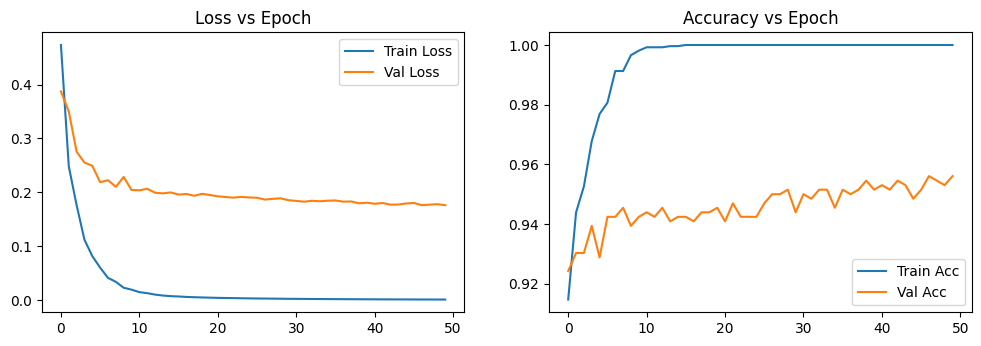

In [ ]:
# Grafik Loss dan Akurasi
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend(); plt.title('Loss vs Epoch')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend(); plt.title('Accuracy vs Epoch')
plt.show()

21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 184ms/step

Classification Report:
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        63
           1     0.9861    0.9861    0.9861        72
           2     0.9412    0.9412    0.9412        68
           3     0.9452    0.9324    0.9388        74
           4     1.0000    0.9577    0.9784        71
           5     0.9706    1.0000    0.9851        66
           6     0.9355    0.9667    0.9508        60
           7     0.9464    0.8983    0.9217        59
           8     0.9028    0.9286    0.9155        70
           9     0.9310    0.9474    0.9391        57

    accuracy                         0.9561       660
   macro avg     0.9559    0.9558    0.9557       660
weighted avg     0.9564    0.9561    0.9561       660



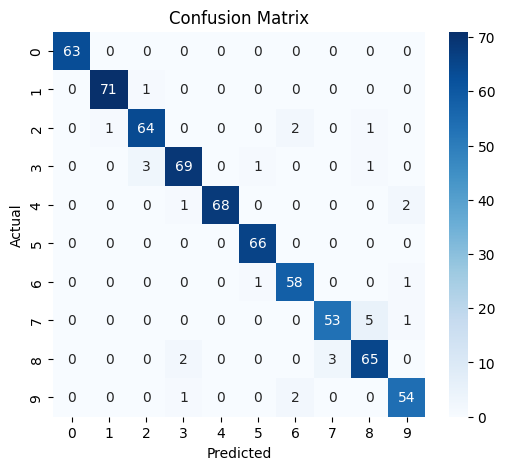

In [ ]:
pred = model.predict(val_images)
pred_labels = np.argmax(pred, axis=1)

print("\nClassification Report:")
print(classification_report(val_labels, pred_labels, target_names=le.classes_, digits=4))

cm = confusion_matrix(val_labels, pred_labels)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
save_path = "/content/drive/MyDrive/Skripsi_Dataset/Model Baru"
os.makedirs(save_path, exist_ok=True)

model_name_keras = "VGG16_TL_TrainOriAug_Model1.keras"
model_name_h5 = "VGG16_TL_TrainOriAug_Model1.h5"

full_path_keras = os.path.join(save_path, model_name_keras)
full_path_h5 = os.path.join(save_path, model_name_h5)

model.save(full_path_keras)
model.save(full_path_h5)

print("\n Model berhasil disimpan dalam format .keras dan .h5")
print(f"Lokasi Keras: {full_path_keras}")
print(f"Lokasi H5: {full_path_h5}")



 Model berhasil disimpan dalam format .keras dan .h5
Lokasi Keras: /content/drive/MyDrive/Skripsi_Dataset/Model Baru/VGG16_TL_TrainOriAug_Model1.keras
Lokasi H5: /content/drive/MyDrive/Skripsi_Dataset/Model Baru/VGG16_TL_TrainOriAug_Model1.h5


# **DATA TEST ASLI**

In [ ]:
import os
import numpy as np
import cv2 as cv
import pandas as pd
import tensorflow as tf
from sklearn import preprocessing
from sklearn.metrics import (
    confusion_matrix, classification_report,
    accuracy_score, precision_score, recall_score, f1_score
)
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
model_path = "/content/drive/MyDrive/Skripsi_Dataset/Model Baru/VGG16_TL_TrainOriAug_Model1.keras"
test_new_dir = "/content/drive/MyDrive/Skripsi_Dataset/Dataset/Test_Images"

In [ ]:
print("Memuat model yang sudah dilatih...")
model = tf.keras.models.load_model(model_path)
print("Model berhasil dimuat!")

Memuat model yang sudah dilatih...
Model berhasil dimuat!


In [ ]:
key_value_test_new = dict()
for i in os.listdir(test_new_dir):
    key_value_test_new[i] = os.listdir(os.path.join(test_new_dir, i))

In [ ]:
df_test_new = []
for key in key_value_test_new.keys():
    for j in key_value_test_new[key]:
        df_test_new.append([key, os.path.join(test_new_dir, key, j)])
df_test_new = pd.DataFrame(df_test_new, columns=('label', 'path'))
print("Total gambar test baru:", len(df_test_new))

Total gambar test baru: 413


In [ ]:
def readimg(path):
    img = cv.imread(path)
    img = cv.resize(img, (224, 224))
    return img

In [ ]:
import multiprocessing
with multiprocessing.Pool(4) as p:
    test_images_new = p.map(readimg, df_test_new['path'])

test_images_new = np.array(test_images_new, dtype='float')

In [ ]:
le = preprocessing.LabelEncoder()
le.fit(df_test_new['label'])
test_labels_new = le.transform(df_test_new['label'])

In [ ]:
print("\n Melakukan prediksi pada data test baru...")
predictions_new = model.predict(test_images_new)
predicted_labels_new = np.argmax(predictions_new, axis=1)


 Melakukan prediksi pada data test baru...
13/13 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step


In [ ]:
accuracy = accuracy_score(test_labels_new, predicted_labels_new)
precision = precision_score(test_labels_new, predicted_labels_new, average='macro')
recall = recall_score(test_labels_new, predicted_labels_new, average='macro')
f1 = f1_score(test_labels_new, predicted_labels_new, average='macro')

In [ ]:
print("\n=== HASIL EVALUASI DATA TEST ASLI TANPA AUGMENTASI ===")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-Score : {f1:.4f}")


=== HASIL EVALUASI DATA TEST ASLI TANPA AUGMENTASI ===
Accuracy : 0.9661
Precision: 0.9684
Recall   : 0.9667
F1-Score : 0.9670


In [ ]:
target_class_names = le.classes_
print("\nClassification Report:")
print(classification_report(test_labels_new, predicted_labels_new, target_names=target_class_names, digits=4))


Classification Report:
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        47
           1     1.0000    1.0000    1.0000        35
           2     0.9767    0.9767    0.9767        43
           3     1.0000    1.0000    1.0000        41
           4     1.0000    0.8810    0.9367        42
           5     1.0000    1.0000    1.0000        40
           6     0.9459    0.9459    0.9459        37
           7     0.8542    0.9318    0.8913        44
           8     0.9318    0.9318    0.9318        44
           9     0.9756    1.0000    0.9877        40

    accuracy                         0.9661       413
   macro avg     0.9684    0.9667    0.9670       413
weighted avg     0.9676    0.9661    0.9663       413



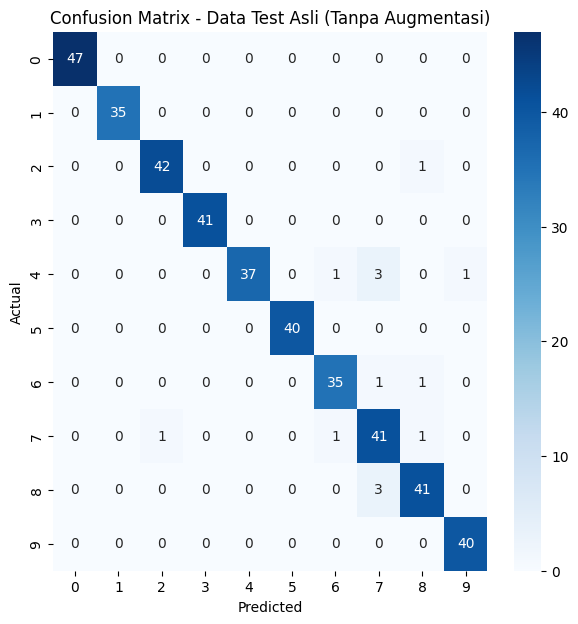

In [ ]:
plt.figure(figsize=(7,7))
cm = confusion_matrix(test_labels_new, predicted_labels_new)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g',
            xticklabels=target_class_names,
            yticklabels=target_class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Data Test Asli (Tanpa Augmentasi)")
plt.show()

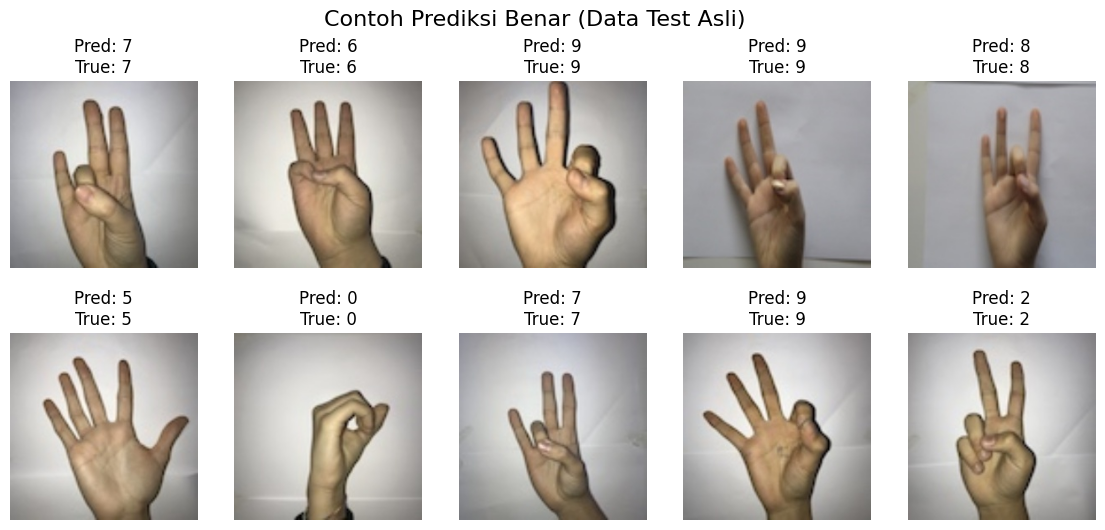

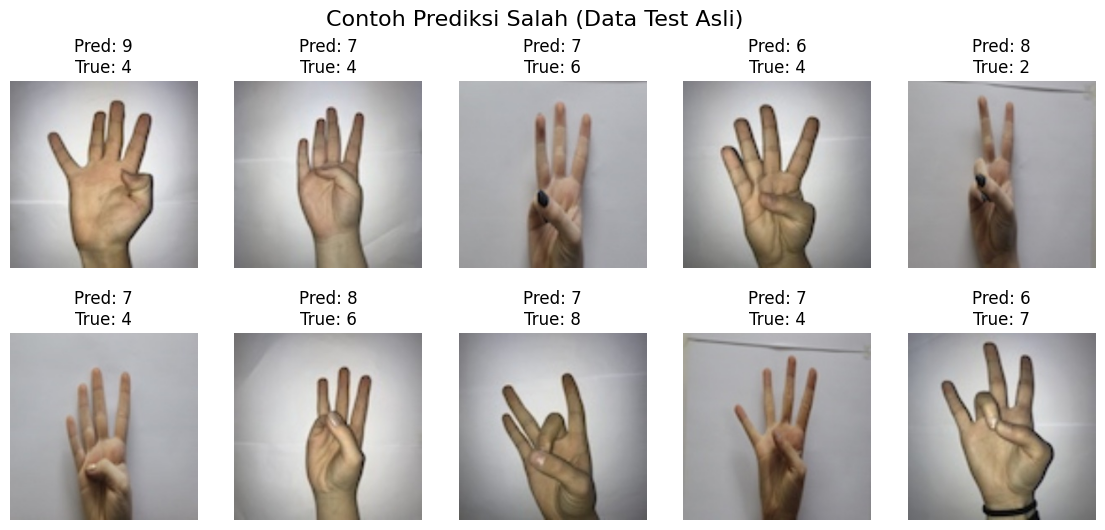

In [ ]:
import random

correct_idx = np.where(predicted_labels_new == test_labels_new)[0]
incorrect_idx = np.where(predicted_labels_new != test_labels_new)[0]

def show_images(indices, title):
    plt.figure(figsize=(14, 6))
    for i, idx in enumerate(random.sample(list(indices), min(10, len(indices)))):
        plt.subplot(2, 5, i + 1)
        img = cv.cvtColor(test_images_new[idx].astype('uint8'), cv.COLOR_BGR2RGB)
        plt.imshow(img)
        plt.title(f"Pred: {target_class_names[predicted_labels_new[idx]]}\nTrue: {target_class_names[test_labels_new[idx]]}")
        plt.axis('off')
    plt.suptitle(title, fontsize=16)
    plt.show()

show_images(correct_idx, "Contoh Prediksi Benar (Data Test Asli)")
show_images(incorrect_idx, "Contoh Prediksi Salah (Data Test Asli)")

# **DATA TEST AUGMENTASI**

In [ ]:
import os
import numpy as np
import cv2 as cv
import pandas as pd
import tensorflow as tf
from sklearn import preprocessing
from sklearn.metrics import (
    confusion_matrix, classification_report,
    accuracy_score, precision_score, recall_score, f1_score
)
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
model_path = "/content/drive/MyDrive/Skripsi_Dataset/Model Baru/VGG16_TL_TrainOriAug_Model1.keras"
test_new_dir = "/content/drive/MyDrive/Skripsi_Dataset/Dataset_Augmented/Data_Test"

In [ ]:
print("Memuat model yang sudah dilatih...")
model = tf.keras.models.load_model(model_path)
print("Model berhasil dimuat!")

Memuat model yang sudah dilatih...
Model berhasil dimuat!


In [ ]:
key_value_test_new = dict()
for i in os.listdir(test_new_dir):
    key_value_test_new[i] = os.listdir(os.path.join(test_new_dir, i))

In [ ]:
df_test_new = []
for key in key_value_test_new.keys():
    for j in key_value_test_new[key]:
        df_test_new.append([key, os.path.join(test_new_dir, key, j)])
df_test_new = pd.DataFrame(df_test_new, columns=('label', 'path'))
print("Total gambar test baru:", len(df_test_new))

Total gambar test baru: 413


In [ ]:
def readimg(path):
    img = cv.imread(path)
    img = cv.resize(img, (224, 224))
    return img

In [ ]:
import multiprocessing
with multiprocessing.Pool(4) as p:
    test_images_new = p.map(readimg, df_test_new['path'])

test_images_new = np.array(test_images_new, dtype='float')

In [ ]:
le = preprocessing.LabelEncoder()
le.fit(df_test_new['label'])
test_labels_new = le.transform(df_test_new['label'])

In [ ]:
print("\n Melakukan prediksi pada data test augmentasi...")
predictions_new = model.predict(test_images_new)
predicted_labels_new = np.argmax(predictions_new, axis=1)


 Melakukan prediksi pada data test augmentasi...
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 232ms/step


In [ ]:
accuracy = accuracy_score(test_labels_new, predicted_labels_new)
precision = precision_score(test_labels_new, predicted_labels_new, average='macro')
recall = recall_score(test_labels_new, predicted_labels_new, average='macro')
f1 = f1_score(test_labels_new, predicted_labels_new, average='macro')

In [ ]:
print("\n=== HASIL EVALUASI DATA TEST AUGMENTASI ===")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-Score : {f1:.4f}")


=== HASIL EVALUASI DATA TEST AUGMENTASI ===
Accuracy : 0.9225
Precision: 0.9264
Recall   : 0.9228
F1-Score : 0.9229


In [ ]:
target_class_names = le.classes_
print("\nClassification Report:")
print(classification_report(test_labels_new, predicted_labels_new, target_names=target_class_names, digits=4))


Classification Report:
              precision    recall  f1-score   support

           0     0.9592    1.0000    0.9792        47
           1     0.9714    0.9714    0.9714        35
           2     0.9524    0.9302    0.9412        43
           3     0.8696    0.9756    0.9195        41
           4     0.9318    0.9762    0.9535        42
           5     0.9750    0.9750    0.9750        40
           6     0.9688    0.8378    0.8986        37
           7     0.7917    0.8636    0.8261        44
           8     0.9189    0.7727    0.8395        44
           9     0.9250    0.9250    0.9250        40

    accuracy                         0.9225       413
   macro avg     0.9264    0.9228    0.9229       413
weighted avg     0.9248    0.9225    0.9220       413



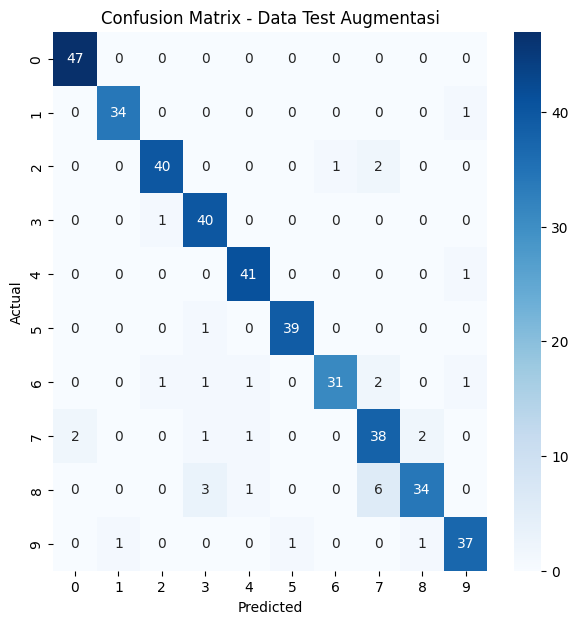

In [ ]:
plt.figure(figsize=(7,7))
cm = confusion_matrix(test_labels_new, predicted_labels_new)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g',
            xticklabels=target_class_names,
            yticklabels=target_class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Data Test Augmentasi")
plt.show()

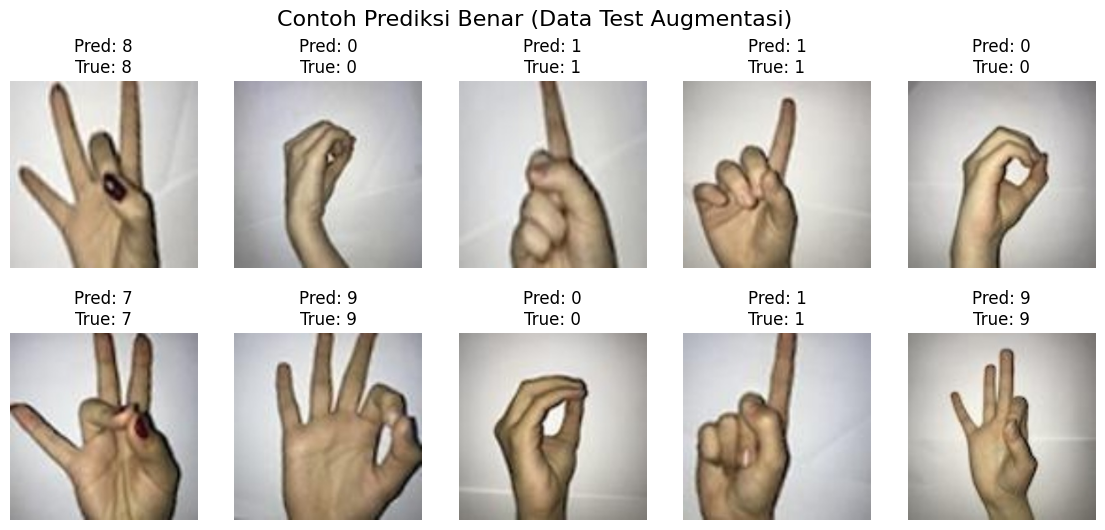

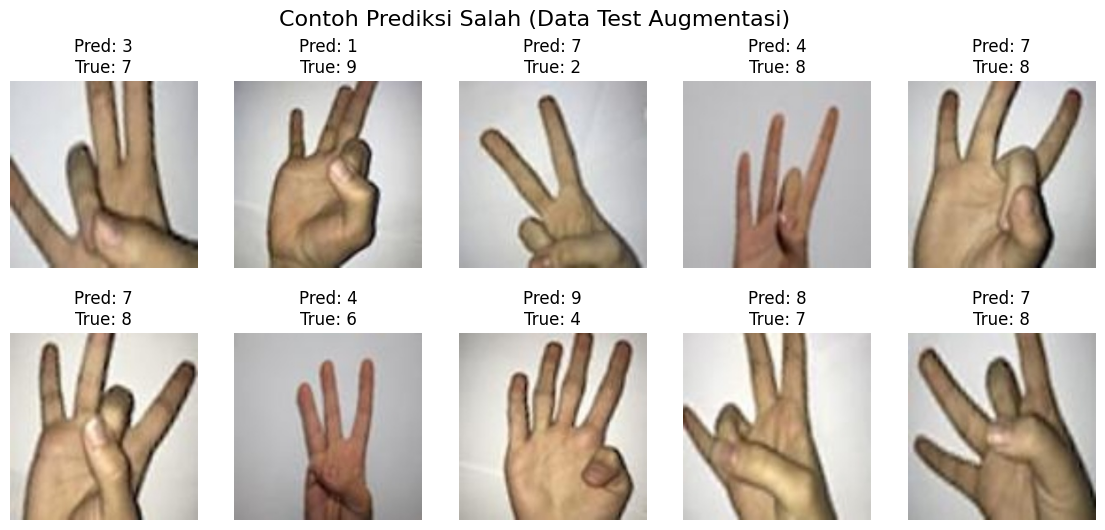

In [ ]:
import random

correct_idx = np.where(predicted_labels_new == test_labels_new)[0]
incorrect_idx = np.where(predicted_labels_new != test_labels_new)[0]

def show_images(indices, title):
    plt.figure(figsize=(14, 6))
    for i, idx in enumerate(random.sample(list(indices), min(10, len(indices)))):
        plt.subplot(2, 5, i + 1)
        img = cv.cvtColor(test_images_new[idx].astype('uint8'), cv.COLOR_BGR2RGB)
        plt.imshow(img)
        plt.title(f"Pred: {target_class_names[predicted_labels_new[idx]]}\nTrue: {target_class_names[test_labels_new[idx]]}")
        plt.axis('off')
    plt.suptitle(title, fontsize=16)
    plt.show()

show_images(correct_idx, "Contoh Prediksi Benar (Data Test Augmentasi)")
show_images(incorrect_idx, "Contoh Prediksi Salah (Data Test Augmentasi)")

# **DATA TEST GABUNGAN**

In [ ]:
import os
import numpy as np
import cv2 as cv
import pandas as pd
import tensorflow as tf
from sklearn import preprocessing
from sklearn.metrics import (
    confusion_matrix, classification_report,
    accuracy_score, precision_score, recall_score, f1_score
)
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
model_path = "/content/drive/MyDrive/Skripsi_Dataset/Model Baru/VGG16_TL_TrainOriAug_Model1.keras"
test_new_dir = "/content/drive/MyDrive/Skripsi_Dataset/Data Test Gabungan"

In [ ]:
print("Memuat model yang sudah dilatih...")
model = tf.keras.models.load_model(model_path)
print("Model berhasil dimuat!")

Memuat model yang sudah dilatih...
Model berhasil dimuat!


In [ ]:
key_value_test_new = dict()
for i in os.listdir(test_new_dir):
    key_value_test_new[i] = os.listdir(os.path.join(test_new_dir, i))

In [ ]:
df_test_new = []
for key in key_value_test_new.keys():
    for j in key_value_test_new[key]:
        df_test_new.append([key, os.path.join(test_new_dir, key, j)])
df_test_new = pd.DataFrame(df_test_new, columns=('label', 'path'))
print("Total gambar test gabungan:", len(df_test_new))

Total gambar test gabungan: 826


In [ ]:
def readimg(path):
    img = cv.imread(path)
    img = cv.resize(img, (224, 224))
    return img

In [ ]:
import multiprocessing
with multiprocessing.Pool(4) as p:
    test_images_new = p.map(readimg, df_test_new['path'])

test_images_new = np.array(test_images_new, dtype='float')

In [ ]:
le = preprocessing.LabelEncoder()
le.fit(df_test_new['label'])
test_labels_new = le.transform(df_test_new['label'])

In [ ]:
print("\n Melakukan prediksi pada data test gabungan...")
predictions_new = model.predict(test_images_new)
predicted_labels_new = np.argmax(predictions_new, axis=1)


 Melakukan prediksi pada data test gabungan...
26/26 ━━━━━━━━━━━━━━━━━━━━ 29s 618ms/step


In [ ]:
accuracy = accuracy_score(test_labels_new, predicted_labels_new)
precision = precision_score(test_labels_new, predicted_labels_new, average='macro')
recall = recall_score(test_labels_new, predicted_labels_new, average='macro')
f1 = f1_score(test_labels_new, predicted_labels_new, average='macro')

In [ ]:
print("\n=== HASIL EVALUASI DATA TEST GABUNGAN ===")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-Score : {f1:.4f}")


=== HASIL EVALUASI DATA TEST GABUNGAN ===
Accuracy : 0.9443
Precision: 0.9467
Recall   : 0.9447
F1-Score : 0.9452


In [ ]:
target_class_names = le.classes_
print("\nClassification Report:")
print(classification_report(test_labels_new, predicted_labels_new, target_names=target_class_names, digits=4))


Classification Report:
              precision    recall  f1-score   support

           0     0.9792    1.0000    0.9895        94
           1     0.9857    0.9857    0.9857        70
           2     0.9647    0.9535    0.9591        86
           3     0.9310    0.9878    0.9586        82
           4     0.9630    0.9286    0.9455        84
           5     0.9875    0.9875    0.9875        80
           6     0.9565    0.8919    0.9231        74
           7     0.8229    0.8977    0.8587        88
           8     0.9259    0.8523    0.8876        88
           9     0.9506    0.9625    0.9565        80

    accuracy                         0.9443       826
   macro avg     0.9467    0.9447    0.9452       826
weighted avg     0.9455    0.9443    0.9443       826



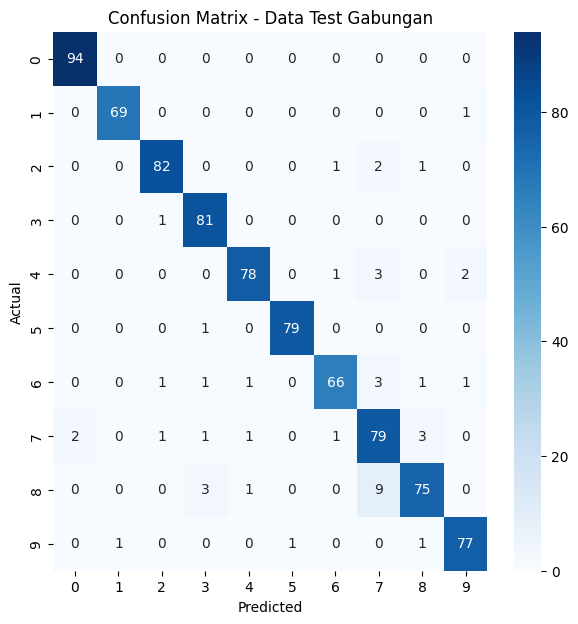

In [ ]:
plt.figure(figsize=(7,7))
cm = confusion_matrix(test_labels_new, predicted_labels_new)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g',
            xticklabels=target_class_names,
            yticklabels=target_class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Data Test Gabungan")
plt.show()

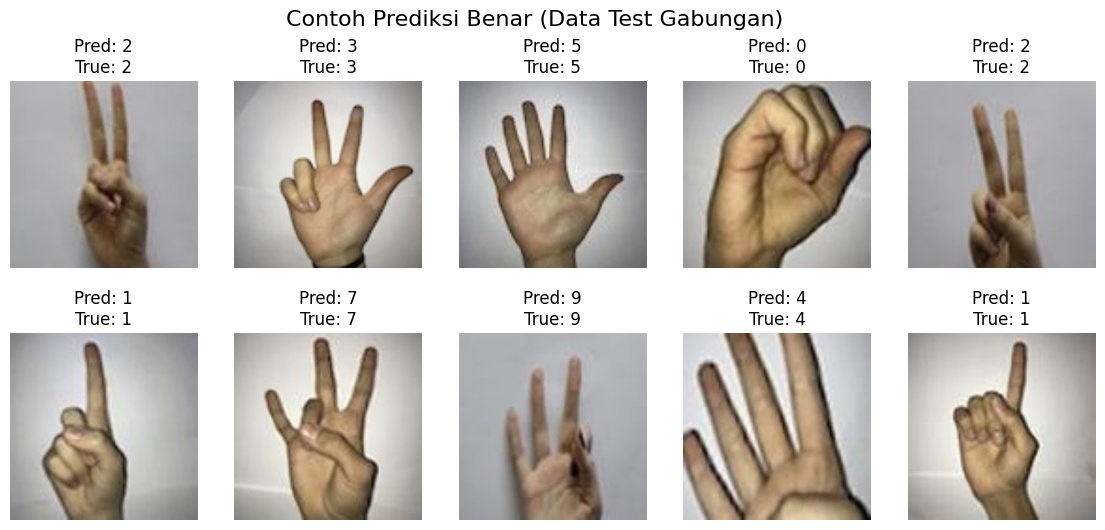

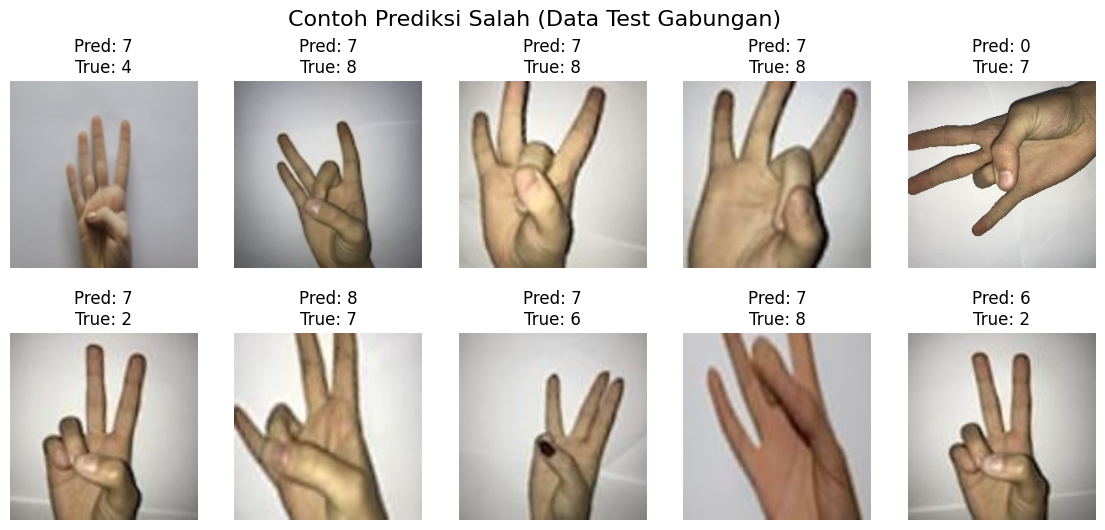

In [ ]:
import random

correct_idx = np.where(predicted_labels_new == test_labels_new)[0]
incorrect_idx = np.where(predicted_labels_new != test_labels_new)[0]

def show_images(indices, title):
    plt.figure(figsize=(14, 6))
    for i, idx in enumerate(random.sample(list(indices), min(10, len(indices)))):
        plt.subplot(2, 5, i + 1)
        img = cv.cvtColor(test_images_new[idx].astype('uint8'), cv.COLOR_BGR2RGB)
        plt.imshow(img)
        plt.title(f"Pred: {target_class_names[predicted_labels_new[idx]]}\nTrue: {target_class_names[test_labels_new[idx]]}")
        plt.axis('off')
    plt.suptitle(title, fontsize=16)
    plt.show()

show_images(correct_idx, "Contoh Prediksi Benar (Data Test Gabungan)")
show_images(incorrect_idx, "Contoh Prediksi Salah (Data Test Gabungan)")